<a href="https://colab.research.google.com/github/mariaeco/Projeto_ICD_UFPB_EnemPB/blob/main/PerfilDesempenho_PB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise do Desempenho dos Candidatos no Enem na Paraíba entre (2003-2019)**


Neste notebook, traçamos o desempenho geral dos alunos e o desempenho de acordo com o tipo de escola e aspectos sócio-econômicos.

In [1]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import zipfile

import warnings
warnings.filterwarnings('ignore')

##**Descrição Geral do Desempenho dos Alunos da Paraíba**

In [2]:
#@title
#@title
df = pd.read_csv('https://github.com/mariaeco/Projeto_ICD_UFPB_EnemPB/blob/main/DADOS/ENEM_POR_ESCOLA_PB_1998-2019.zip?raw=true', compression = 'zip', sep=',')
df.drop([0],inplace=True) #primeira linha ta entrando com os nomes do index 'mean'(vindo da criaçao da tabela no arquivo 'ProjetoICD_OrganizacaoDadosTemporal.ipynb')
df['Internet'] = np.where(df['Internet'] == 0, "Não", "Sim")
df['Computador'] = np.where(df['Computador'] == 0, "Não", "Sim")
df['Celular'] = np.where(df['Celular'] == 0, "Não", "Sim")

df =df.query('NU_ANO>2002')

sumario = df[['NU_NOTA_REDACAO','NU_NOTA_OBJETIVA','NU_NOTA_LC','NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_MT']].describe().round(1)
sumario.rename(columns = {'NU_NOTA_REDACAO':'Redação',
                          'NU_NOTA_OBJETIVA': 'Provas Objetivas',
                          'NU_NOTA_LC': 'Linguagens',
                          'NU_NOTA_CH': 'Humanas',
                          'NU_NOTA_CN':'Natureza',
                          'NU_NOTA_MT':'Matemática' }, inplace = True)
sumario

,Redação,Provas Objetivas,Linguagens,Humanas,Natureza,Matemática
count,170695.0,170791.0,129653.0,129614.0,129672.0,129711.0
mean,550.5,470.9,501.7,524.3,479.8,495.2
std,177.7,106.8,71.7,83.0,75.5,104.3
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,460.0,425.2,454.1,462.9,422.6,417.7
50%,560.0,474.3,503.9,526.6,468.7,474.2
75%,650.0,532.1,551.2,585.2,528.9,553.3
max,1000.0,984.1,816.7,859.1,828.7,991.5


As média geral trás um indicativo de que a maioria dos alunos apresentam um baixo desempenho no Enem. Percebemos que apenas para Liguagens e Humanas, houve uma média acima de 50%, entretanto, ainda muito baixa. 

##**NOTAS GERAIS**
Boxplot mostrando a média geral de cada componente.

[Text(0, 0, 'Redação'),
 Text(0, 0, 'Provas Objetivas'),
 Text(0, 0, 'Linguagens'),
 Text(0, 0, 'Ciências Humanas'),
 Text(0, 0, 'Ciências da Natureza'),
 Text(0, 0, 'Matemática')]

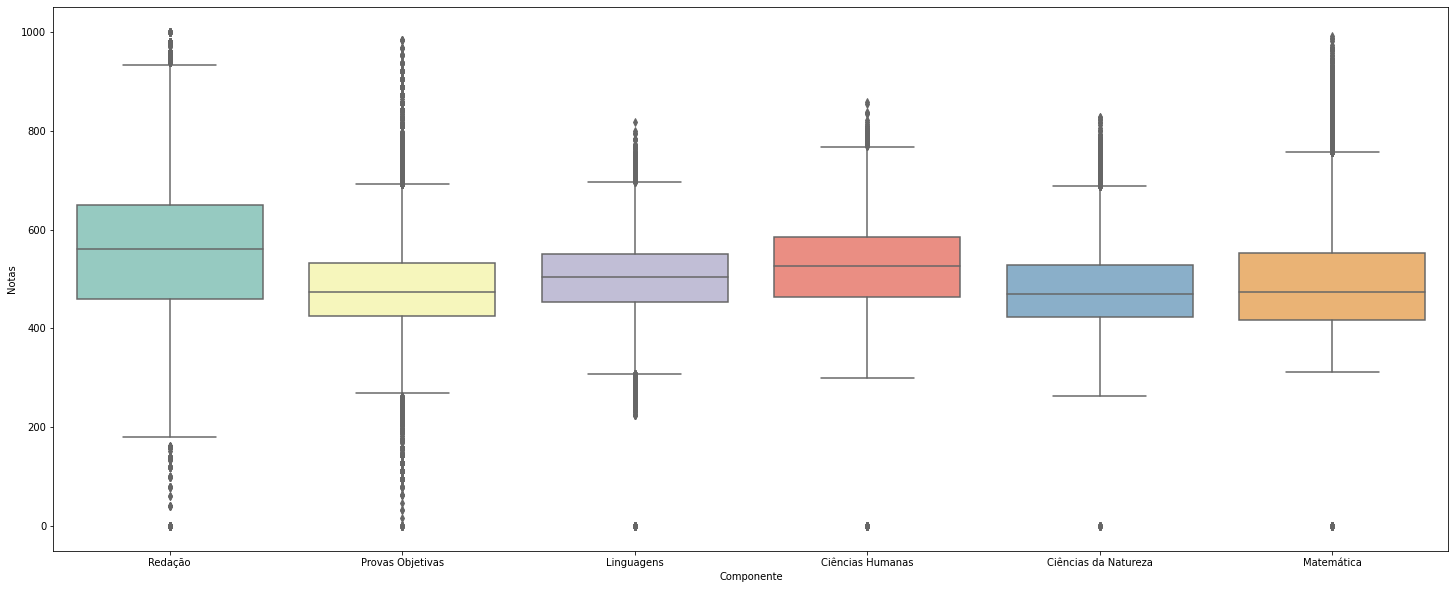

In [5]:
#@title

notas = df[['NU_NOTA_REDACAO','NU_NOTA_OBJETIVA','NU_NOTA_LC','NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_MT']]
plot_notas = pd.melt(df, id_vars=['NU_ANO'], value_vars=notas)
plot_notas.rename(columns={'value': 'Notas', 'variable':'Componente'}, inplace=True)

plt.subplots(figsize=(25,10)) #fig, axes = plt.subplots(1, 2, figsize=(25, 6), gridspec_kw={'width_ratios': [1,4 ]})
sns.set_style("white")
sns.set(font_scale=2)

# geral
g = sns.boxplot(x="Componente",y="Notas", palette="Set3",data=plot_notas);
g.set_xticklabels(['Redação', 'Provas Objetivas', 'Linguagens','Ciências Humanas','Ciências da Natureza','Matemática'], rotation=0)


#**ANÁLISES DO DESEMPENHO**

Abaixo faço o relatório apenas da Média Geral. Entretanto, as análises para os demais componentes da média não foram muito diferentes.

In [11]:
#@title
df['NOTA'] = df['NU_MEDIA_GERAL']
nome ="Média Geral"

##**Nota Média por Categoria**

Conclusões dos resultasdos do gráfico abaixo:

- Vemos que não há diferença da nota média entre sexo, mas pessoas que se consideram indígenas, pretas e pardas, tem uma nota média menor que pessoas brancas e amarelas.

- As notas mais baixas também são encontradas entre os estudantes de Escolas Estaduais e Municipais. Escolas públicas Federais, como os IFs apresentam uma média geral próximo a 600, semelhante as escolas privadas. Trançando um boxplot ou um histograma, veriamos que tais dados possuem uma grande variação, entretanto, a média com cerca de mais de 100pontos a menos em escolas Estaduais e Municipais, é um indicativo da precariedade do ensino, cujos alunos não atingem 50% da prova.
- A maior renda e maior graduação dos pais é um fator decisivo para o aumento das notas no Enem. 



Text(0, 0.5, 'Possui Internet?')

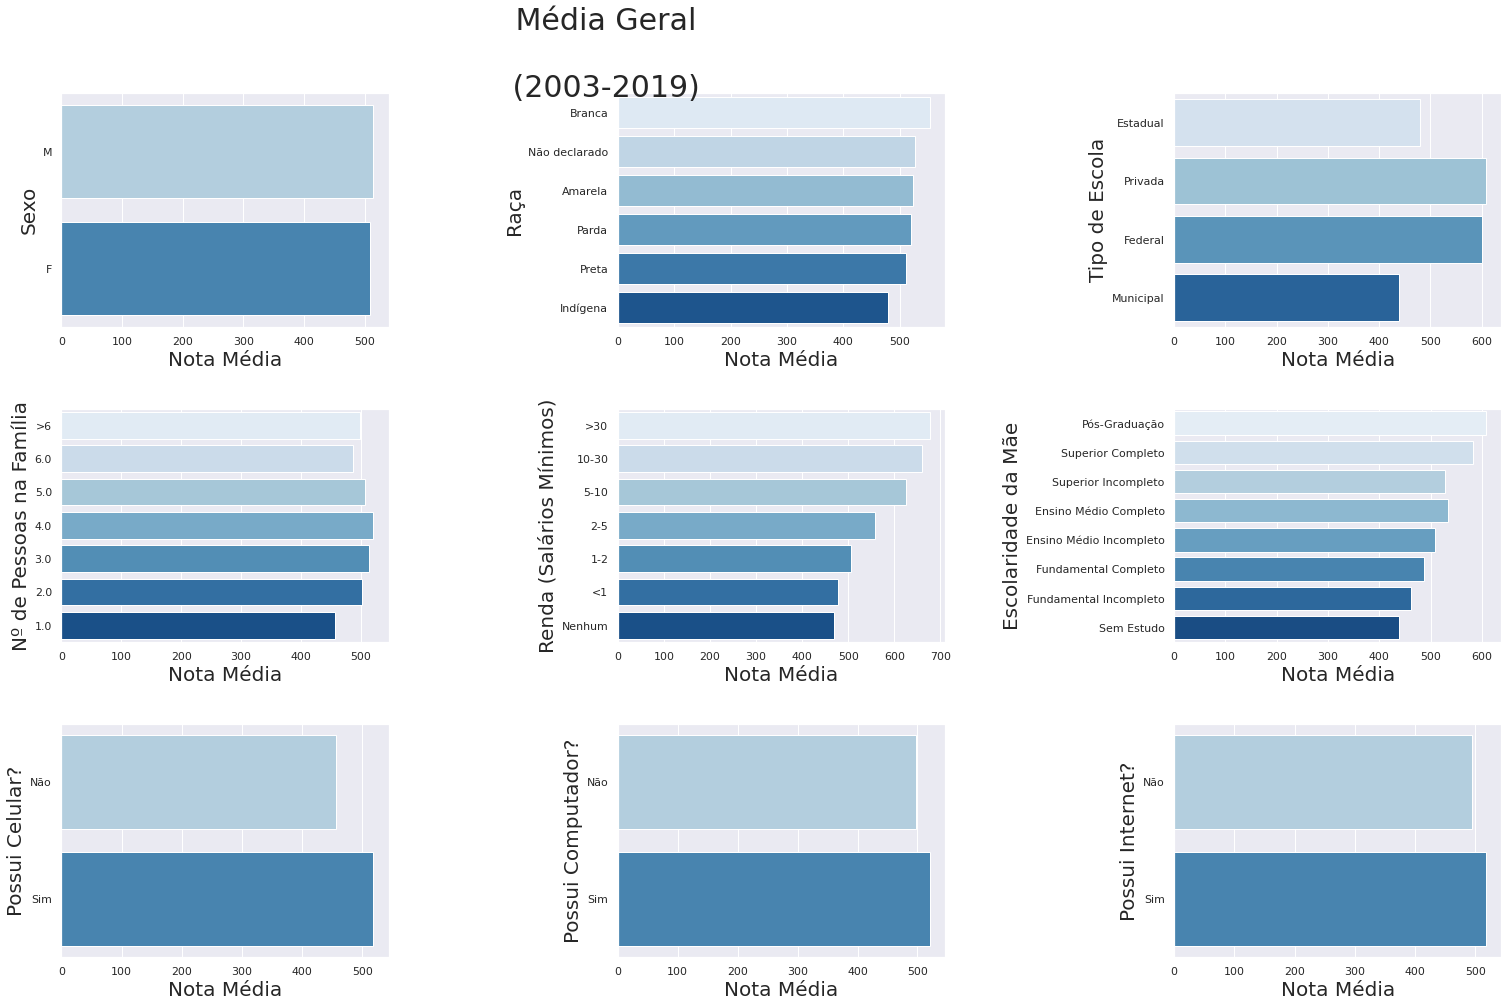

In [15]:
#@title
fig, axes = plt.subplots(3, 3, figsize=(25, 15))
sns.set_style("white")
sns.set(font_scale=1)

fig.suptitle(f' {nome}\n \n (2003-2019)', fontsize=30)
 
# Distancia entre os subplots
plt.subplots_adjust(left=0.2,
                    bottom=0.1, 
                    right=1, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.35)

#SEXO =================================================================================================================
sexo=df.groupby(by=['TP_SEXO'], as_index=False)['NOTA'].mean()
sexo['NOTA']=sexo['NOTA']
sexo.sort_values(by='NOTA',ascending=False, inplace=True)

sns.barplot(ax=axes[0, 0], y ='TP_SEXO', x ='NOTA', palette = 'Blues',data = sexo)
axes[0,0].set_xlabel('Nota Média', fontsize=20)
axes[0,0].set_ylabel('Sexo', fontsize=20)

#RAÇA =================================================================================================================
raca=df.groupby(by=['TP_COR_RACA'], as_index=False)['NOTA'].mean()
raca['NOTA']=raca['NOTA']
raca.sort_values(by='NOTA',ascending=False, inplace=True)

sns.barplot(ax=axes[0, 1], y ='TP_COR_RACA', x ='NOTA', palette = 'Blues', data = raca)
axes[0,1].set_xlabel('Nota Média', fontsize=20)
axes[0,1].set_ylabel('Raça', fontsize=20)

#DEPENDENCIA ADMNISTRITIVA ================================================================================================================================
tipEsc=df.groupby(by=['TP_DEPENDENCIA_ADM_ESC'], as_index=False)['NOTA'].mean()
tipEsc['NOTA']=tipEsc['NOTA']

order = ['Estadual','Privada', 'Federal', 'Municipal']
sns.barplot(ax=axes[0, 2], y ='TP_DEPENDENCIA_ADM_ESC', x ='NOTA', palette = 'Blues', order=order, data = tipEsc)
axes[0,2].set_xlabel('Nota Média', fontsize=20)
axes[0,2].set_ylabel('Tipo de Escola', fontsize=20)


#N DE PESSOAS NA CASA =================================================================================================================
df['NP'] = np.where(df['NPessoas'] > 6, ">6", df['NPessoas'] )
nPessoas=df.groupby(by=['NP'], as_index=False)['NOTA'].mean()
nPessoas['NOTA']=nPessoas['NOTA']

order = ['>6','6.0', '5.0',  '4.0', '3.0','2.0','1.0']
sns.barplot(ax=axes[1, 0], y ='NP', x ='NOTA', palette = 'Blues',order=order, data = nPessoas)
axes[1,0].set_xlabel('Nota Média', fontsize=20)
axes[1,0].set_ylabel('Nº de Pessoas na Família', fontsize=20)

#RENDA ================================================================================================================================
renda=df.groupby(by=['Renda'], as_index=False)['NOTA'].mean()
renda['NOTA']=renda['NOTA']

order = ['>30','10-30', '5-10',  '2-5', '1-2','<1', 'Nenhum']
sns.barplot(ax=axes[1, 1], y ='Renda', x ='NOTA', palette = 'Blues',order=order, data = renda)
axes[1,1].set_xlabel('Nota Média', fontsize=20)
axes[1,1].set_ylabel('Renda (Salários Mínimos)', fontsize=20)

#ESCOLARIDADE ==============================================================================================================
esc=df.groupby(by=['Escolaridade_Mae'], as_index=False)['NOTA'].mean()
esc['NOTA']=esc['NOTA']
esc.sort_values(by='NOTA',ascending=False, inplace=True)

order_esc = ['Pós-Graduação', 'Superior Completo','Superior Incompleto',
         'Ensino Médio Completo', 'Ensino Médio Incompleto',
         'Fundamental Completo', 'Fundamental Incompleto','Sem Estudo' ]
sns.barplot(ax=axes[1, 2], y ='Escolaridade_Mae', x ='NOTA', palette = 'Blues', 
            order=order_esc, data = esc)
axes[1,2].set_xlabel('Nota Média', fontsize=20)
axes[1,2].set_ylabel('Escolaridade da Mãe', fontsize=20)


#CELULAR ================================================================================================================================
cel=df.groupby(by=['Celular'], as_index=False)['NOTA'].mean()
cel['NOTA']=cel['NOTA']

#order = ['Estadual','Privada', 'Federal', 'Municipal']
sns.barplot(ax=axes[2, 0], y ='Celular', x ='NOTA', palette = 'Blues', data = cel)
axes[2,0].set_xlabel('Nota Média', fontsize=20)
axes[2,0].set_ylabel('Possui Celular?', fontsize=20)


#Computador ================================================================================================================================
comp=df.groupby(by=['Computador'], as_index=False)['NOTA'].mean()
comp['NOTA']=comp['NOTA']

sns.barplot(ax=axes[2, 1], y ='Computador', x ='NOTA', palette = 'Blues', data = comp)
axes[2,1].set_xlabel('Nota Média', fontsize=20)
axes[2,1].set_ylabel('Possui Computador?', fontsize=20)


#Internet ================================================================================================================================
intern=df.groupby(by=['Internet'], as_index=False)['NOTA'].mean()
intern['NOTA']=intern['NOTA']

sns.barplot(ax=axes[2, 2], y ='Internet', x ='NOTA', palette = 'Blues', data = intern)
axes[2,2].set_xlabel('Nota Média', fontsize=20)
axes[2,2].set_ylabel('Possui Internet?', fontsize=20)

### **Nota em função da Escolaridade, renda e tipo de dependencia administrativa**

É importante observar, como falado acima, o papel da Escolaridade dos Pais e da Renda sobre a média do Enem. Para todos os tipos de escola, pais com maior escolaridade e famílias com maior renda apresentam, em geral, maiores notas. As escolas privadas e federais, mantém o padrão, mas ainda apresentam maiores notas.

Uma renda que garanta uma vida de qualidade, pais com maior escolaridade e escolas com boa estrutura, formação de profissionais, afetam positivamente o desempenhos dos alunos.


Text(0, 0.5, 'Renda (Salários Mínimos)')

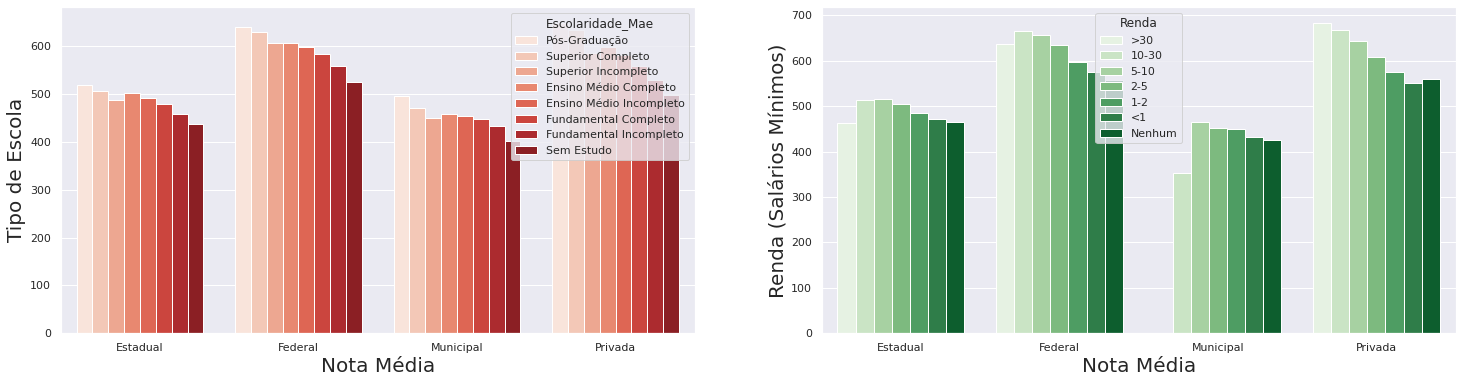

In [30]:
#@title
fig, axes = plt.subplots(1, 2, figsize=(25, 6))
sns.set_style("white")
sns.set(font_scale=1)

#DEPENDENCIA ADMNISTRITIVA ================================================================================================================================
tipEsc=df.groupby(by=['TP_DEPENDENCIA_ADM_ESC','Escolaridade_Mae'], as_index=False)['NOTA'].mean()
tipEsc['NOTA']=tipEsc['NOTA']


order_esc = ['Pós-Graduação', 'Superior Completo','Superior Incompleto',
         'Ensino Médio Completo', 'Ensino Médio Incompleto',
         'Fundamental Completo', 'Fundamental Incompleto','Sem Estudo' ]
order = ['Estadual','Privada', 'Federal', 'Municipal']
sns.barplot(ax=axes[0], x ='TP_DEPENDENCIA_ADM_ESC', y ='NOTA', hue='Escolaridade_Mae', palette = 'Reds', hue_order=order_esc ,data = tipEsc)
axes[0].set_xlabel('Nota Média', fontsize=20)
axes[0].set_ylabel('Tipo de Escola', fontsize=20)


#RENDA ================================================================================================================================
renda=df.groupby(by=['TP_DEPENDENCIA_ADM_ESC','Renda'], as_index=False)['NOTA'].mean()
renda['NOTA']=renda['NOTA']

order = ['>30','10-30', '5-10','2-5','1-2', '<1','Nenhum']
sns.barplot(ax=axes[1], hue='Renda', y ='NOTA',x='TP_DEPENDENCIA_ADM_ESC',palette = 'Greens',hue_order=order, data = renda)
axes[1].set_xlabel('Nota Média', fontsize=20)
axes[1].set_ylabel('Renda (Salários Mínimos)', fontsize=20)


##**Nota Média por Categoria ao Longo dos Anos**

AS tendências relatadas acima, são seguindas nos padrões temporais.
Mas, observamos um aumento da nota média geral ao longo dos anos.

Esse aumento das notas, pode ter ocorrido pela melhoria da qualidade do ensino, ou por mudanças na forma de avaliação nas edições do ENEM.

Nós vemos um abrupto aumento das notas em relação ao sexo, ao número de pessoas por família. Entretanto, alguns resultados são interessantes de serem observados:
- O aumento proporcional das notas do Enem ao longo do tempo parece ter sido maior nas escolas Estaduais e Municipais, do que nas Privadas. A escola privada mantém um padrão médio das notas, desde 2003.
- Se observarmos a escolaridade esse aumento proporcional da nota, também é maior quando os candidatos tem pais com menor escolaridade. Enquanto canditados com alta escolaridade, o aumento da nota do enem não foi evidente. Pdrão semelhante ocorre para a renda: Maior aumento da nota do Enem com pais com renda menor, pais com renda alta, não houve muitas mudanças.
É interessante notar que para mães com alta escolaridade, a média do Enem continuou a mesma. Ou seja, a escolaridade dos pais parece um fator muito importante.
- A nota média das pessaos que possuem computador e internet aumenta ao longo do tempo, talvez em virtude do maior acesso, melhor internet, e mudança no consumo de livros. Observe que no início a nota média dos alunos que não tem internet nem computador é maior, e esse resultado se inverte.



**OBS.: Embora esses resultados sejam bastante interessantes, eles são descritivos.** Modelos estatísticos e mais análises são requeridas para verificar a força do efeito da escolaridade, renda e outros fatores sobre as notas no enem.

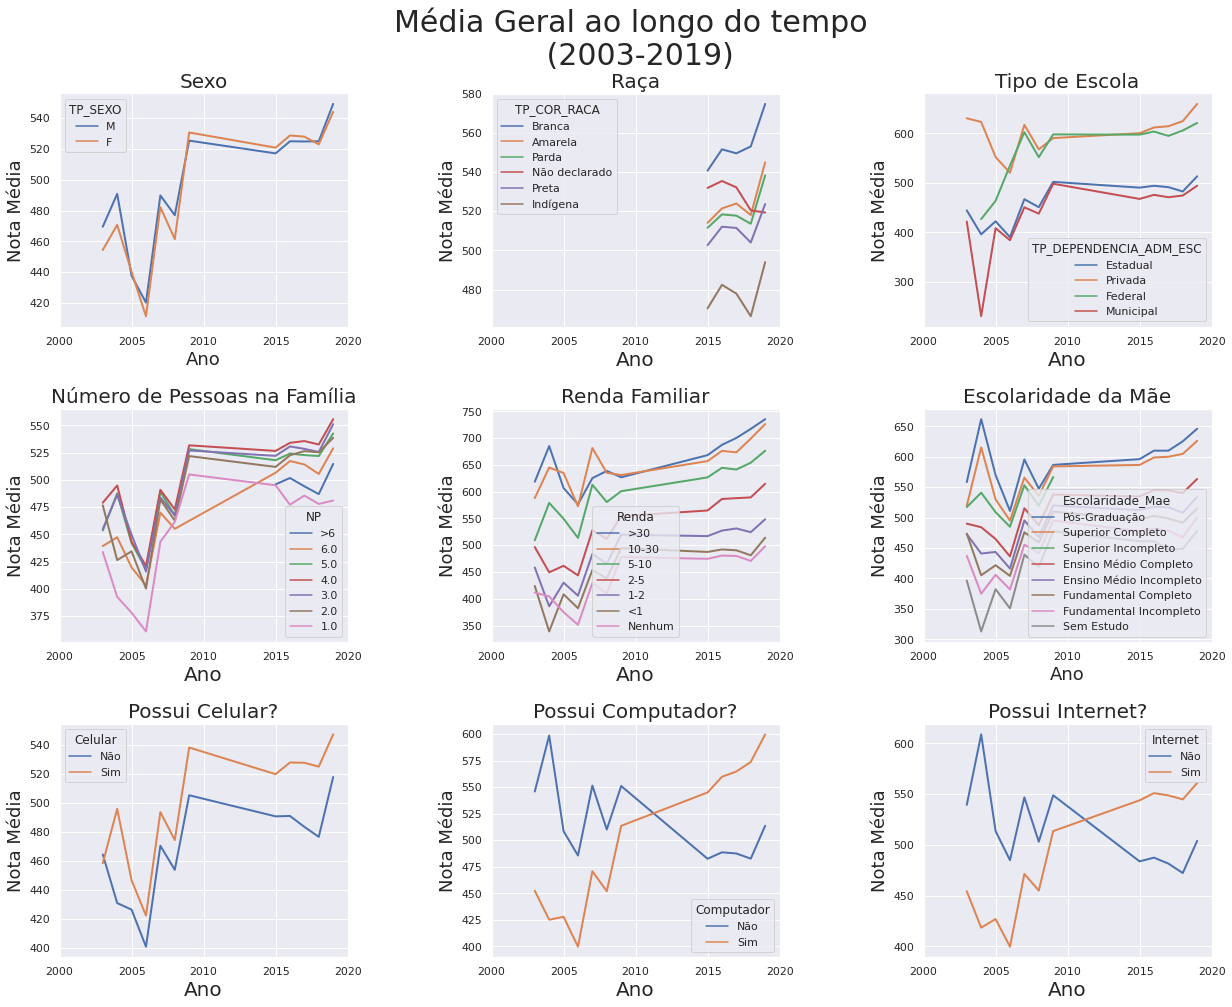

In [10]:
#@title
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
sns.set_style("white")
sns.set(font_scale=1)

# Distancia entre os subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.35)

fig.suptitle(f'{nome} ao longo do tempo \n (2003-2019)', fontsize=30)

#SEXO =================================================================================================================
sexo=df.groupby(by=['NU_ANO','TP_SEXO'], as_index=False)['NOTA'].mean()
sexo.sort_values(by='NOTA',ascending=False, inplace=True)

sns.lineplot(ax=axes[0, 0], x='NU_ANO', hue ='TP_SEXO', y ='NOTA',linewidth = 2,data = sexo)
axes[0,0].set_xlabel('Ano', fontsize=18)
axes[0,0].set_ylabel('Nota Média', fontsize=18)
axes[0,0].set_title('Sexo', fontsize=20)
axes[0,0].set_xticks([2000,2005,2010,2015,2020])

#RAÇA =================================================================================================================
raca=df.groupby(by=['NU_ANO','TP_COR_RACA'], as_index=False)['NOTA'].mean()
raca.sort_values(by='NOTA',ascending=False, inplace=True)

sns.lineplot(ax=axes[0, 1], x='NU_ANO', hue ='TP_COR_RACA', y ='NOTA', linewidth = 2, data = raca)
axes[0,1].set_xlabel('Ano', fontsize=20)
axes[0,1].set_ylabel('Nota Média', fontsize=18)
axes[0,1].set_title('Raça', fontsize=20)
axes[0,1].set_xticks([2000,2005,2010,2015,2020])

#DEPENDENCIA ADMNISTRITIVA ================================================================================================================================
tipEsc=df.groupby(by=['NU_ANO','TP_DEPENDENCIA_ADM_ESC'], as_index=False)['NOTA'].mean()

order = ['Estadual','Privada', 'Federal', 'Municipal']
sns.lineplot(ax=axes[0, 2], x='NU_ANO', hue ='TP_DEPENDENCIA_ADM_ESC', y='NOTA', linewidth = 2, hue_order=order, data = tipEsc)
axes[0,2].set_xlabel('Ano', fontsize=20)
axes[0,2].set_ylabel('Nota Média', fontsize=18)
axes[0,2].set_title('Tipo de Escola', fontsize=20)
axes[0,2].set_xticks([2000,2005,2010,2015,2020])

#N DE PESSOAS NA CASA =================================================================================================================
nPessoas=df.groupby(by=['NU_ANO','NP'], as_index=False)['NOTA'].mean()

order = ['>6','6.0', '5.0',  '4.0', '3.0','2.0','1.0']
sns.lineplot(ax=axes[1, 0], x ='NU_ANO', hue ='NP', y ='NOTA',hue_order=order, linewidth = 2, data = nPessoas)
axes[1,0].set_xlabel('Ano', fontsize=20)
axes[1,0].set_ylabel('Nota Média', fontsize=18)
axes[1,0].set_title('Número de Pessoas na Família', fontsize=20)
axes[1,0].set_xticks([2000,2005,2010,2015,2020])

#RENDA ================================================================================================================================
renda=df.groupby(by=['NU_ANO','Renda'], as_index=False)['NOTA'].mean()

order = ['>30','10-30', '5-10',  '2-5', '1-2','<1', 'Nenhum']
sns.lineplot(ax=axes[1, 1], x='NU_ANO', hue ='Renda', y ='NOTA', linewidth = 2,hue_order=order, data = renda)
axes[1,1].set_xlabel('Ano', fontsize=20)
axes[1,1].set_ylabel('Nota Média', fontsize=18)
axes[1,1].set_title('Renda Familiar', fontsize=20)
axes[1,1].set_xticks([2000,2005,2010,2015,2020])

#ESCOLARIDADE ==============================================================================================================
esc=df.groupby(by=['NU_ANO','Escolaridade_Mae'], as_index=False)['NOTA'].mean()
esc.sort_values(by='NOTA',ascending=False, inplace=True)

sns.lineplot(ax=axes[1, 2], x='NU_ANO', hue ='Escolaridade_Mae', y ='NOTA', 
             linewidth = 2, hue_order=order_esc, data = esc)
axes[1,2].set_xlabel('Ano', fontsize=18)
axes[1,2].set_ylabel('Nota Média', fontsize=18)
axes[1,2].set_title('Escolaridade da Mãe', fontsize=20)
axes[1,2].set_xticks([2000,2005,2010,2015,2020])

#CELULAR ================================================================================================================================
cel=df.groupby(by=['NU_ANO','Celular'], as_index=False)['NOTA'].mean()

sns.lineplot(ax=axes[2, 0], x='NU_ANO', hue ='Celular', y ='NOTA',  
             linewidth = 2, data = cel)
axes[2,0].set_xlabel('Ano', fontsize=20)
axes[2,0].set_ylabel('Nota Média', fontsize=18)
axes[2,0].set_title('Possui Celular?', fontsize=20)
axes[2,0].set_xticks([2000,2005,2010,2015,2020])

#Computador ================================================================================================================================
comp=df.groupby(by=['NU_ANO','Computador'], as_index=False)['NOTA'].mean()

sns.lineplot(ax=axes[2, 1], x='NU_ANO', hue ='Computador', y ='NOTA', 
             linewidth = 2, data = comp)
axes[2,1].set_xlabel('Ano', fontsize=20)
axes[2,1].set_ylabel('Nota Média', fontsize=18)
axes[2,1].set_title('Possui Computador?', fontsize=20)
axes[2,1].set_xticks([2000,2005,2010,2015,2020])

#Internet ================================================================================================================================
intern=df.groupby(by=['NU_ANO','Internet'], as_index=False)['NOTA'].mean()

sns.lineplot(ax=axes[2, 2], x='NU_ANO', hue ='Internet', y ='NOTA',
             linewidth = 2, data = intern)
axes[2,2].set_xlabel('Ano', fontsize=20)
axes[2,2].set_ylabel('Nota Média', fontsize=18)
axes[2,2].set_title('Possui Internet?', fontsize=20)
axes[2,2].set_xticks([2000,2005,2010,2015,2020])